In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import *


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FIREBLZE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('spam_ham_dataset.csv')
data.info()
data=data.replace(to_replace ="ham",
                 value ="Legit")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

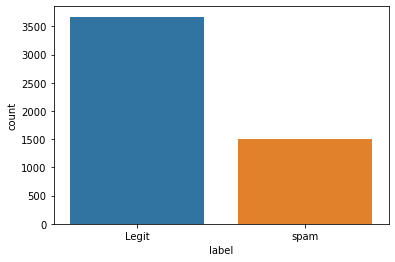

In [3]:
sns.countplot(x="label", data=data)

In [4]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]:\S+|subject:\S+|nbsp"

In [5]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

data.text = data.text.apply(lambda x: preprocess(x))
data.head()


,Unnamed: 0,label,text,label_num
0,605,Legit,subject: enron methanol ; meter # : 988291 fol...,0
1,2349,Legit,"subject: hpl nom january 9 , 2001 ( see attach...",0
2,3624,Legit,"subject: neon retreat ho ho ho , ' around wond...",0
3,4685,spam,"subject: photoshop , windows , office . cheap ...",1
4,2030,Legit,subject: : indian springs deal book teco pvr r...,0


In [6]:
data = data.drop(['Unnamed: 0', 'label'], axis=1)
data = data.rename(columns = {"label_num" : "Label"})
data

,text,Label
0,subject: enron methanol ; meter # : 988291 fol...,0
1,"subject: hpl nom january 9 , 2001 ( see attach...",0
2,"subject: neon retreat ho ho ho , ' around wond...",0
3,"subject: photoshop , windows , office . cheap ...",1
4,subject: : indian springs deal book teco pvr r...,0
...,...,...
5166,subject: put 10 ft transport volumes decreased...,0
5167,subject: 3 / 4 / 2000 following noms hpl ' tak...,0
5168,subject: calpine daily gas nomination > > juli...,0
5169,subject: industrial worksheets august 2000 act...,0


In [7]:
x = data['text']
y = data['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                         random_state=7)
print("Train Data size:", len(x_train))
print("Test Data size", len(x_test))

Train Data size: 3878
Test Data size 1293


In [8]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1000
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 43372


In [9]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(x_train),
                        maxlen = 50)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test),
                       maxlen = 50)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (3878, 50)
Testing X Shape: (1293, 50)


In [10]:
MAX_SEQUENCE_LENGTH = 50
n_lstm = 200
drop_lstm =0.2
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional, GRU
embeding_dim = 16
drop_value = 0.2
n_dense = 24
num_epochs = 19

In [14]:
#LSTM Spam detection architecture
lstm = Sequential()
lstm.add(Embedding(vocab_size, embeding_dim, input_length=MAX_SEQUENCE_LENGTH))
lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=False))
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = lstm.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=num_epochs, verbose=2)
lstm.summary()


Epoch 1/19
122/122 - 16s - loss: 0.3145 - accuracy: 0.8564 - val_loss: 0.1838 - val_accuracy: 0.9490
Epoch 2/19
122/122 - 16s - loss: 0.0381 - accuracy: 0.9871 - val_loss: 0.0799 - val_accuracy: 0.9783
Epoch 3/19
122/122 - 16s - loss: 0.0133 - accuracy: 0.9964 - val_loss: 0.0983 - val_accuracy: 0.9791
Epoch 4/19
122/122 - 16s - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0889 - val_accuracy: 0.9791
Epoch 5/19
122/122 - 16s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.1174 - val_accuracy: 0.9776
Epoch 6/19
122/122 - 17s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1197 - val_accuracy: 0.9799
Epoch 7/19
122/122 - 16s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1079 - val_accuracy: 0.9799
Epoch 8/19
122/122 - 17s - loss: 7.5166e-04 - accuracy: 0.9997 - val_loss: 0.1285 - val_accuracy: 0.9807
Epoch 9/19
122/122 - 17s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1175 - val_accuracy: 0.9807
Epoch 10/19
122/122 - 19s - loss: 5.2578e-04 - accuracy: 0.9997 - val_loss: 0.0984 - va

In [15]:
trainPredict2 = lstm.predict(x_train, batch_size=256)
lstm.reset_states()
testPredict2 = lstm.predict(x_test, batch_size=256)
predicted2=np.concatenate((trainPredict2,testPredict2),axis=0)
trainScore2 = lstm.evaluate(x_train, y_train, verbose=0)
print("Our accuracy is %{}".format(trainScore2[1]*100))



Our accuracy is %100.0


### Bi LSTM

In [16]:
bi_lstm = Sequential()
bi_lstm.add(Embedding(vocab_size, embeding_dim, input_length=MAX_SEQUENCE_LENGTH))
bi_lstm.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=False)))
bi_lstm.add(Dense(1, activation='sigmoid'))
bi_lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
# Training
num_epochs = 23

history2 = bi_lstm.fit(x_train, y_train, epochs=num_epochs,
                    validation_data=(x_test, y_test),
                     verbose=2)

Epoch 1/23
122/122 - 14s - loss: 0.3577 - accuracy: 0.8324 - val_loss: 0.1021 - val_accuracy: 0.9629
Epoch 2/23
122/122 - 13s - loss: 0.0841 - accuracy: 0.9776 - val_loss: 0.1261 - val_accuracy: 0.9629
Epoch 3/23
122/122 - 13s - loss: 0.0587 - accuracy: 0.9838 - val_loss: 0.1067 - val_accuracy: 0.9675
Epoch 4/23
122/122 - 14s - loss: 0.0256 - accuracy: 0.9946 - val_loss: 0.1129 - val_accuracy: 0.9729
Epoch 5/23
122/122 - 13s - loss: 0.0222 - accuracy: 0.9951 - val_loss: 0.0916 - val_accuracy: 0.9745
Epoch 6/23
122/122 - 13s - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.0897 - val_accuracy: 0.9745
Epoch 7/23
122/122 - 13s - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.1081 - val_accuracy: 0.9737
Epoch 8/23
122/122 - 13s - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.1094 - val_accuracy: 0.9760
Epoch 9/23
122/122 - 13s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.1345 - val_accuracy: 0.9729
Epoch 10/23
122/122 - 13s - loss: 0.0084 - accuracy: 0.9992 - val_loss: 0.0920 - val_accura

In [17]:
# make predictions
trainPredict3 = bi_lstm.predict(x_train, batch_size=256)
bi_lstm.reset_states()
testPredict3 = bi_lstm.predict(x_test, batch_size=256)
predicted3=np.concatenate((trainPredict3,testPredict3),axis=0)
trainScore3 = bi_lstm.evaluate(x_train, y_train, verbose=0)
print("Our accuracy is %{}".format(trainScore3[1]*100))

Our accuracy is %100.0


#### TRAINING AND VALIDATION GRAPHS

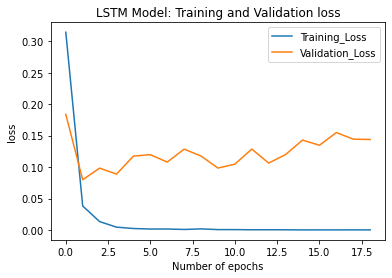

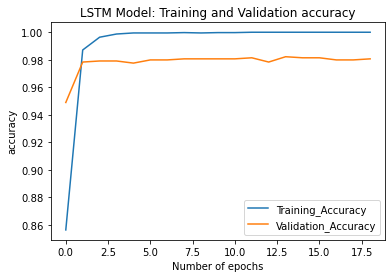

In [19]:
metrics = pd.DataFrame(history.history)

metrics.rename(columns= {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, 
               inplace = True)

def plot_graphs(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

plot_graphs('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

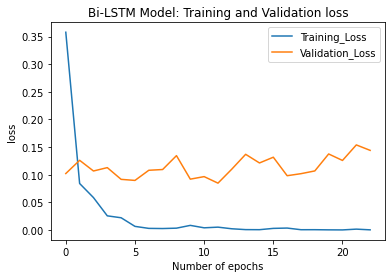

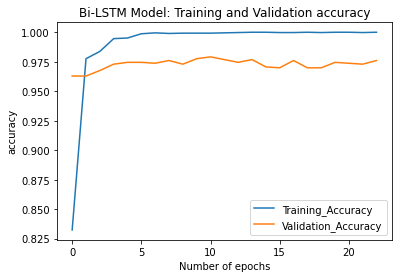

In [20]:
metrics = pd.DataFrame(history2.history)

metrics.rename(columns= {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, 
               inplace = True)

def plot_graphs(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Bi-LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

plot_graphs('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

### ROC AUC

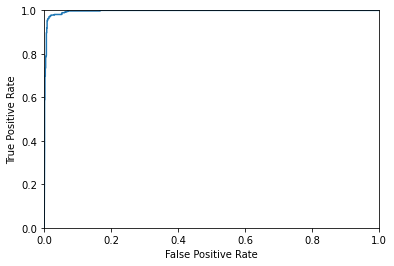

In [21]:
from sklearn.metrics import roc_curve
y_pred_LSTM = lstm.predict(x_test)
fpr_lstm, tpr_lstm, thresholds_keras = roc_curve(y_test,testPredict2)

from sklearn.metrics import auc
auc_keras = auc(fpr_lstm, tpr_lstm)
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()
plot_roc_curve(fpr_lstm,tpr_lstm)

Instructions for updating:
Please use `model.predict()` instead.


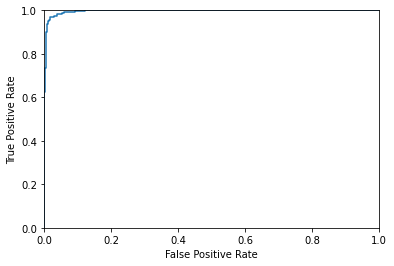

In [23]:
from sklearn.metrics import roc_curve
y_pred_bi_LSTM = bi_lstm.predict_proba(x_test)
fpr_bi_lstm, tpr_bi_lstm, thresholds_keras = roc_curve(y_test,testPredict3)

from sklearn.metrics import auc
auc_keras = auc(fpr_bi_lstm, tpr_bi_lstm)
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate')
  
  plt.show()
plot_roc_curve(fpr_bi_lstm,tpr_bi_lstm)